<a href="https://colab.research.google.com/github/jjooki/TIL/blob/main/uos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/data/open/train.csv')
train

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [4]:
sample = pd.read_csv('/content/drive/MyDrive/data/open/sample_submission.csv')
sample

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


In [5]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      1461 non-null   int64  
 1   광진구     1461 non-null   float64
 2   동대문구    1461 non-null   float64
 3   성동구     1461 non-null   float64
 4   중랑구     1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


In [18]:
train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d')

In [20]:
train

,일시,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288
3,2018-01-04,0.792,0.542,0.914,0.292
4,2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350
1457,2021-12-28,4.510,3.890,3.714,2.700
1458,2021-12-29,4.490,3.524,3.660,2.524
1459,2021-12-30,4.444,3.574,3.530,2.506


In [25]:
from prophet import Prophet

광진구 = Prophet()

In [21]:
def 데이터셋만들기(train, column):
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train[column]
    return df

In [22]:
광진구데이터 = 데이터셋만들기(train, '광진구')
동대문구데이터 = 데이터셋만들기(train, '동대문구')
성동구데이터 = 데이터셋만들기(train, '성동구')
중랑구데이터 = 데이터셋만들기(train, '중랑구')

In [23]:
광진구데이터

,ds,y
0,2018-01-01,0.592
1,2018-01-02,0.840
2,2018-01-03,0.828
3,2018-01-04,0.792
4,2018-01-05,0.818
...,...,...
1456,2021-12-27,3.830
1457,2021-12-28,4.510
1458,2021-12-29,4.490
1459,2021-12-30,4.444


In [26]:
광진구.fit(광진구데이터)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsx757jn/7zfykuqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsx757jn/04r46wic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8188', 'data', 'file=/tmp/tmpmsx757jn/7zfykuqx.json', 'init=/tmp/tmpmsx757jn/04r46wic.json', 'output', 'file=/tmp/tmpmsx757jn/prophet_modelbh8lihq2/prophet_model-20221114065530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
광진구미래 = 광진구.make_future_dataframe(periods=334, freq='D')
광진구예측 = 광진구.predict(광진구미래)

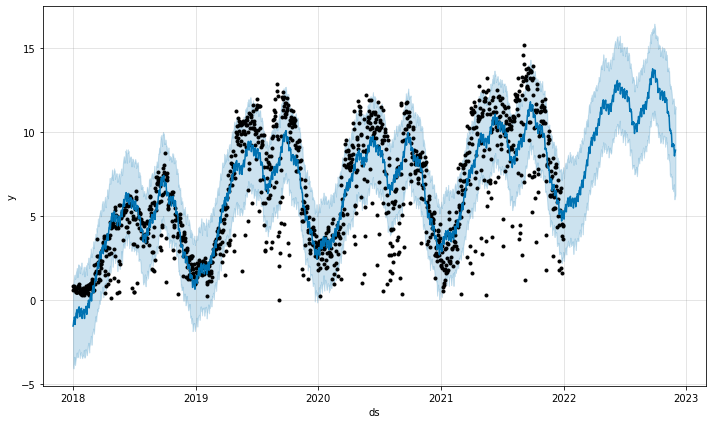

In [31]:
fig1 = 광진구.plot(광진구예측)

In [34]:
광진구예측

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,2.552203,-3.861328,0.983597,2.552203,2.552203,-4.084246,-4.084246,-4.084246,-0.089080,-0.089080,-0.089080,-3.995166,-3.995166,-3.995166,0.0,0.0,0.0,-1.532043
1,2018-01-02,2.556675,-4.057958,1.031775,2.556675,2.556675,-3.983361,-3.983361,-3.983361,-0.027749,-0.027749,-0.027749,-3.955612,-3.955612,-3.955612,0.0,0.0,0.0,-1.426686
2,2018-01-03,2.561147,-3.829659,1.250279,2.561147,2.561147,-3.769139,-3.769139,-3.769139,0.139930,0.139930,0.139930,-3.909070,-3.909070,-3.909070,0.0,0.0,0.0,-1.207992
3,2018-01-04,2.565619,-3.785290,1.367560,2.565619,2.565619,-3.775744,-3.775744,-3.775744,0.081117,0.081117,0.081117,-3.856861,-3.856861,-3.856861,0.0,0.0,0.0,-1.210124
4,2018-01-05,2.570092,-3.354979,1.499918,2.570092,2.570092,-3.564060,-3.564060,-3.564060,0.236334,0.236334,0.236334,-3.800393,-3.800393,-3.800393,0.0,0.0,0.0,-0.993968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2022-11-26,10.910250,6.470719,11.470647,10.368576,11.496860,-1.948125,-1.948125,-1.948125,-0.003644,-0.003644,-0.003644,-1.944481,-1.944481,-1.944481,0.0,0.0,0.0,8.962125
1791,2022-11-27,10.915725,5.997933,11.090585,10.371601,11.504874,-2.340318,-2.340318,-2.340318,-0.336908,-0.336908,-0.336908,-2.003410,-2.003410,-2.003410,0.0,0.0,0.0,8.575407
1792,2022-11-28,10.921200,6.224569,11.551289,10.374782,11.514111,-2.146016,-2.146016,-2.146016,-0.089080,-0.089080,-0.089080,-2.056936,-2.056936,-2.056936,0.0,0.0,0.0,8.775184
1793,2022-11-29,10.926674,6.151311,11.334529,10.378935,11.523360,-2.134096,-2.134096,-2.134096,-0.027749,-0.027749,-0.027749,-2.106347,-2.106347,-2.106347,0.0,0.0,0.0,8.792578


In [35]:
광진구예측.loc[1461:, 'yhat'].values

array([ 5.11020349,  4.82196777,  5.12181269,  5.24082848,  5.47044967,
        5.47637638,  5.69765926,  5.5236259 ,  5.25479881,  5.56426693,
        5.6832793 ,  5.90367122,  5.89177073,  6.08746272,  5.88108881,
        5.57433433,  5.84156508,  5.9153837 ,  6.08901703,  6.03018348,
        6.18011886,  5.93043999,  5.58399835,  5.81618738,  5.86047423,
        6.01076773,  5.93527233,  6.07550656,  5.82316552,  5.48097954,
        5.72403245,  5.78530955,  5.95808677,  5.90980976,  6.08114072,
        5.86285149,  5.55671409,  5.83685096,  5.93531425,  6.14450432,
        6.13107557,  6.33500649,  6.14651165,  5.86694649,  6.17016663,
        6.28811081,  6.51321771,  6.51232483,  6.72572654,  6.54406973,
        6.2692382 ,  6.57568857,  6.69600739,  6.92330079,  6.92506568,
        7.14222055,  6.9659754 ,  6.69869267,  7.0152027 ,  7.1483444 ,
        7.3913427 ,  7.4116724 ,  7.65008683,  7.49749066,  7.25580892,
        7.59931551,  7.76019129,  8.03092288,  8.07819116,  8.34

In [37]:
from prophet import Prophet

def 예측하기(train, column):
    model = Prophet()
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train[column]
    model.fit(df)
    future = model.make_future_dataframe(periods=334, freq='D')
    forecast = model.predict(future)
    return forecast.loc[1461:, 'yhat'].values

In [36]:
sample

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


In [38]:
sample['광진구'] = 예측하기(train, '광진구')
sample['동대문구'] = 예측하기(train, '동대문구')
sample['성동구'] = 예측하기(train, '성동구')
sample['중랑구'] = 예측하기(train, '중랑구')
sample

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsx757jn/0ciye4tb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsx757jn/_j9o7j2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57410', 'data', 'file=/tmp/tmpmsx757jn/0ciye4tb.json', 'init=/tmp/tmpmsx757jn/_j9o7j2g.json', 'output', 'file=/tmp/tmpmsx757jn/prophet_model7k2voivv/prophet_model-20221114070418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsx

,일시,광진구,동대문구,성동구,중랑구
0,20220101,5.110203,4.662176,3.896330,3.303345
1,20220102,4.821968,4.401556,3.769503,3.082229
2,20220103,5.121813,5.151970,4.121842,3.323606
3,20220104,5.240828,5.303184,4.215095,3.448420
4,20220105,5.470450,5.442060,4.370883,3.569264
...,...,...,...,...,...
329,20221126,8.962125,8.007408,6.372682,5.352272
330,20221127,8.575407,7.668120,6.167637,5.070159
331,20221128,8.775184,8.337838,6.441324,5.250297
332,20221129,8.792578,8.406381,6.455402,5.313642


In [40]:
sample.to_csv('/content/drive/MyDrive/submission.csv', index=False)

In [ ]:
## 통합본 코드입니다.

from prophet import Prophet
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/data/open/train.csv')
sample = pd.read_csv('/content/drive/MyDrive/data/open/sample_submission.csv')

train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d')

def 예측하기(train, column):
    model = Prophet()
    df = pd.DataFrame()
    df['ds'] = train['일시']
    df['y'] = train[column]
    model.fit(df)
    future = model.make_future_dataframe(periods=334, freq='D')
    forecast = model.predict(future)
    return forecast.loc[1461:, 'yhat'].values

sample['광진구'] = 예측하기(train, '광진구')
sample['동대문구'] = 예측하기(train, '동대문구')
sample['성동구'] = 예측하기(train, '성동구')
sample['중랑구'] = 예측하기(train, '중랑구')
sample.to_csv('/content/drive/MyDrive/submission.csv', index=False)

In [ ]:
"""
Hyper-parameter Tuning with Prophet
Tutorial
"""
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)